IMPORT LIBRARY

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import zipfile

DOWNLOAD DATASETS

In [2]:
!wget --no-check-certificate https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip -O rockpaperscissors.zip


'wget' is not recognized as an internal or external command,
operable program or batch file.


EKSTRAK DATASETS

In [3]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: 'rockpaperscissors.zip'

BIKIN LOKASI FOLDER HASIL EKSTRACK

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio('rockpaperscissors/rps-cv-images', 'rockpaperscissors/output', seed=1, ratio=(.6, .4))

#'rockpaperscissors/rps-cv-images': Lokasi folder yang berisi dataset asli.
#'rockpaperscissors/output': Lokasi folder output tempat dataset yang sudah dibagi akan disimpan.
# seed=1: Menetapkan seed untuk random number generator, sehingga pembagian dataset akan konsisten setiap kali kode dijalankan.
# ratio=(.6, .4): Rasio untuk membagi dataset. Dalam hal ini, 60% dari dataset akan digunakan untuk training set dan 40% untuk validation set.

Copying files: 2188 files [00:00, 2419.52 files/s]


In [ ]:
base_dir = 'rockpaperscissors/output'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

MELIHAT HASIL EKSTRAKSI DATASETS

In [ ]:
os.listdir('rockpaperscissors/output/train')
os.listdir('rockpaperscissors/output/val')

['paper', 'scissors', 'rock']

MEMBUAT DIRECTORI UNTUK DATA TRAIN DAN VALIDASI

In [ ]:
# DATA TRAIN
train_batu_dir = os.path.join(train_dir,'rock')
train_gunting_dir = os.path.join(train_dir,'scissors')
train_kertas_dir = os.path.join(train_dir,'paper')

In [ ]:
# DATA VALIDASI
val_batu_dir = os.path.join(validation_dir,'rock')
val_gunting_dir = os.path.join(validation_dir,'scissors')
val_kertas_dir = os.path.join(validation_dir,'paper')

MEMBUAT IMAGE DATA GENERATOR

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_train_generator = ImageDataGenerator(
    rotation_range=20,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )

data_test_generator = ImageDataGenerator(
    rotation_range=20,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )


#rotation_range=20: Mengacak rotasi gambar dalam rentang 20 derajat.
#rescale=1./255: Mengubah skala nilai piksel gambar dari rentang [0, 255] menjadi [0, 1] dengan membaginya dengan 255. Ini adalah langkah pra-pemrosesan umum untuk normalisasi.
#shear_range=0.2: Mengaplikasikan transformasi geser (shear transformation) dengan intensitas 0.2.
#zoom_range=0.2: Mengaplikasikan zoom acak pada gambar dalam rentang 20%.
#horizontal_flip=True: Membalik gambar secara horizontal secara acak.
#fill_mode='nearest': Menentukan bagaimana mengisi piksel yang hilang setelah augmentasi (misalnya, setelah rotasi atau geser). nearest berarti piksel terdekat akan digunakan untuk mengisi area kosong.


DATA DARI GENERATORNYA DIMASUKIN KE DATA LATIH AGAR BISA DIPELAJARI:

In [ ]:

train_generator = data_train_generator.flow_from_directory(
        train_dir, #data train
        target_size=(150, 150),  # mengubah resolusi gambar
        batch_size=32,
        class_mode='categorical', #klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        color_mode='rgb',
        seed=42
)

validation_generator = data_test_generator.flow_from_directory(
        validation_dir, # data validasi
        target_size=(150, 150),  # mengubah resolusi gambar
        batch_size=32,
        class_mode='categorical', #klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        color_mode='rgb',
        seed=42
)

#data_train_gen adalah instance dari ImageDataGenerator yang telah kita inisialisasi sebelumnya untuk data pelatihan.
#flow_from_directory adalah metode yang menghasilkan batch data gambar langsung dari direktori.
#train_dir:Path ke direktori yang berisi gambar untuk data pelatihan. Dalam direktori ini, gambar diorganisasi dalam subdirektori yang masing-masing sesuai dengan satu kelas.
#target_size=(150, 150):Mengubah ukuran semua gambar menjadi 150x150 piksel. Ini memastikan semua gambar memiliki ukuran yang konsisten sebelum dimasukkan ke dalam model.
#batch_size=32:Menentukan jumlah gambar yang akan diproses dalam satu batch. Model akan menerima batch gambar ini selama proses pelatihan.
#class_mode='categorical':Menentukan mode kelas. categorical digunakan untuk klasifikasi multi-kelas, yang berarti setiap gambar diberi label dengan vektor biner yang memiliki panjang sama dengan jumlah kelas.
#color_mode='rgb':Menentukan mode warna gambar. rgb berarti gambar akan dimuat dalam mode warna merah, hijau, biru (tiga saluran warna).
#seed=42:Seed untuk pengacakan data. Penggunaan seed yang sama memastikan bahwa pembagian data acak tetap konsisten setiap kali kode dijalankan.

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


MEMBANGUN ARSITEKTUR CNN (CONVOLUTIONAL NEURAL NETWORK)

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model = Sequential() #deklarasi untuk jenis model

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
#Kode ini menambahkan lapisan Convolutional 2D pertama ke dalam model dengan:
#32 filter,Ukuran kernel 3x3,Fungsi aktivasi ReLU (Rectified Linear Unit)
#input_shape=(150, 150, 3) menunjukkan bahwa input gambar berukuran 150x150 piksel dengan 3 kanal warna (RGB).
model.add(MaxPooling2D(2, 2))
#Kode ini menambahkan lapisan MaxPooling pertama 2D dengan ukuran pool 2x2. MaxPooling berfungsi untuk mengurangi dimensi spasial dari output lapisan sebelumnya, yang membantu mengurangi jumlah parameter dan komputasi dalam jaringan.
model.add(MaxPooling2D(2,2))
#Kode ini menambahkan lapisan MaxPooling 2D kedua dengan ukuran pool 2x2.
model.add(Conv2D(64, (3,3), activation='relu'))
#Kode ini menambahkan lapisan Convolutional 2D kedua
#64 filter,Ukuran kernel 3x3,Fungsi aktivasi ReLU
model.add(MaxPooling2D(2,2))
#Kode ini menambahkan lapisan MaxPooling 2D ketiga dengan ukuran pool 2x2.
model.add(Conv2D(64, (3,3), activation='relu'))
#Kode ini menambahkan lapisan Convolutional 2D ketiga dengan:
#64 filter,Ukuran kernel 3x3,Fungsi aktivasi ReLU
model.add(MaxPooling2D(2,2))
#Kode ini menambahkan lapisan MaxPooling 2D keempat dengan ukuran pool 2x2.
model.add(Flatten())
#menambahkan lapisan Flatten, yang akan mengubah output dari lapisan sebelumnya (yang berdimensi banyak) menjadi satu dimensi vektor. Ini diperlukan sebelum menambahkan lapisan fully connected (Dense).
model.add(Dense(128, activation='relu'))
#Kode ini menambahkan lapisan Dense (fully connected) dengan 128 neuron dan fungsi aktivasi ReLU. Lapisan ini adalah lapisan yang mempelajari pola dari fitur yang diekstraksi oleh lapisan Convolutional.
model.add(Dense(3, activation='softmax'))
#Kode ini menambahkan lapisan output Dense dengan 3 neuron dan fungsi aktivasi softmax. Fungsi softmax mengkonversi output menjadi probabilitas untuk klasifikasi multikelas, yang menunjukkan kemungkinan masing-masing kelas. Di sini, model dikonfigurasi untuk mengklasifikasikan input gambar menjadi salah satu dari tiga kelas.



LATIH MODEL DAN COMPILE DATA

In [ ]:
#compile data
model.compile(
    loss='categorical_crossentropy',
    #Menggunakan categorical crossentropy sebagai fungsi kerugian (loss function). Fungsi ini biasanya digunakan untuk klasifikasi multikelas.
    optimizer = tf.optimizers.Adam(),
    #Menggunakan optimizer Adam untuk mengupdate bobot model selama pelatihan. Adam adalah salah satu algoritma optimasi yang populer karena efisiensi dan kemampuannya untuk menyesuaikan learning rate.
    metrics=['accuracy']
    #Menggunakan akurasi sebagai metrik evaluasi selama pelatihan dan validasi. Ini memungkinkan kita untuk memantau seberapa baik model memprediksi kelas dengan benar.
)



#latih model
model.fit(
    train_generator,
    #Objek generator yang menghasilkan batch data pelatihan. Ini biasanya digunakan untuk data augmentation dan efisiensi memori saat bekerja dengan dataset besar.
    steps_per_epoch=25,
    #Jumlah batch yang akan diambil dari train_generator untuk menyelesaikan satu epoch pelatihan. Dengan kata lain, setiap epoch akan terdiri dari 25 langkah.
    epochs=20,
    #Jumlah total epoch untuk melatih model. Model akan dilatih selama 20 kali pengulangan dari keseluruhan dataset.
    validation_data=validation_generator,
    #Objek generator yang menghasilkan batch data validasi. Ini digunakan untuk mengevaluasi performa model pada data yang tidak dilihat selama pelatihan.
    validation_steps=5,
    #Jumlah batch yang akan diambil dari validation_generator untuk menyelesaikan satu epoch validasi.
    verbose=2
    #Mode output selama pelatihan. verbose=2 akan menampilkan log pelatihan dalam format yang ringkas.
)

Epoch 1/20
25/25 - 27s - loss: 1.0187 - accuracy: 0.4663 - val_loss: 0.9211 - val_accuracy: 0.5375 - 27s/epoch - 1s/step
Epoch 2/20
25/25 - 27s - loss: 0.7417 - accuracy: 0.6925 - val_loss: 0.6513 - val_accuracy: 0.7437 - 27s/epoch - 1s/step
Epoch 3/20
25/25 - 29s - loss: 0.4919 - accuracy: 0.8213 - val_loss: 0.4192 - val_accuracy: 0.8438 - 29s/epoch - 1s/step
Epoch 4/20
25/25 - 26s - loss: 0.3216 - accuracy: 0.8888 - val_loss: 0.2610 - val_accuracy: 0.8875 - 26s/epoch - 1s/step
Epoch 5/20
25/25 - 23s - loss: 0.3117 - accuracy: 0.8913 - val_loss: 0.3797 - val_accuracy: 0.8687 - 23s/epoch - 933ms/step
Epoch 6/20
25/25 - 26s - loss: 0.2402 - accuracy: 0.9100 - val_loss: 0.2760 - val_accuracy: 0.9187 - 26s/epoch - 1s/step
Epoch 7/20
25/25 - 25s - loss: 0.2190 - accuracy: 0.9187 - val_loss: 0.1974 - val_accuracy: 0.9500 - 25s/epoch - 981ms/step
Epoch 8/20
25/25 - 26s - loss: 0.2228 - accuracy: 0.9275 - val_loss: 0.2267 - val_accuracy: 0.9000 - 26s/epoch - 1s/step
Epoch 9/20
25/25 - 27s - l

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0         
 g2D)                                                            
                                                      

MENCOBA MODEL DENGAN MENAMBAHKAN DATA

Saving 1i1dlQrE6JnhYXE4.png to 1i1dlQrE6JnhYXE4.png
1/1 [==============================] - 1s 890ms/step
Gambar tersebut membentuk Gunting


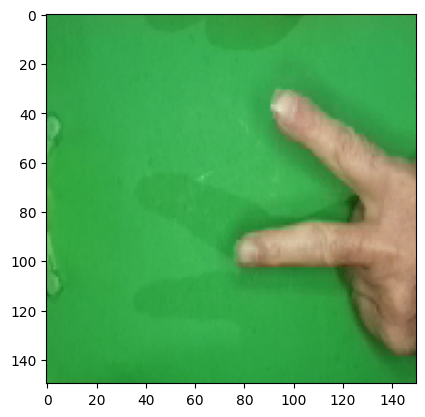

In [ ]:
#import library
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from google.colab import files

uploaded = files.upload() #Membuka dialog untuk mengunggah file dari komputer lokal ke Google Colab. File yang diunggah disimpan dalam variabel uploaded.

for fn in uploaded.keys(): #Memulai loop untuk memproses setiap file yang diunggah. uploaded.keys() menghasilkan daftar nama file yang diunggah.

  path = fn #fn: Menyimpan nama file saat ini ke variabel path
  img = image.load_img(path, target_size =(150,150))#Memuat gambar dari path dan mengubah ukurannya menjadi 150x150 piksel.
  imgplot = plt.imshow(img)#Menampilkan gambar yang dimuat menggunakan matplotlib.
  x = image.img_to_array(img)#Mengubah gambar menjadi array numpy.
  x = np.expand_dims(x, axis=0)#Menambahkan dimensi tambahan di depan array untuk membuatnya sesuai dengan input model (misalnya, dari (150, 150, 3) menjadi (1, 150, 150, 3)).

  images = np.vstack([x])#Membuat batch gambar dengan menumpuk array gambar x (meskipun di sini hanya ada satu gambar).
  classes = model.predict(images, batch_size=10)#Menggunakan model yang sudah dilatih untuk memprediksi kelas dari gambar images dengan batch size 10.

  if classes[0,0]!=0: # Memeriksa apakah elemen pertama dari prediksi tidak sama dengan nol, yang berarti gambar diprediksi sebagai 'Kertas'.
    result = 'Kertas'
  elif classes[0,1]!=0: # Memeriksa apakah elemen kedua dari prediksi tidak sama dengan nol, yang berarti gambar diprediksi sebagai 'Batu'.
    result = 'Batu'
  else:                 # Jika tidak ada kondisi di atas yang terpenuhi, maka gambar diprediksi sebagai 'Gunting'.
    result = 'Gunting'

print(f"Gambar tersebut membentuk {result}")